In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install distutils


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [7]:
dirs = 'flowers/'
categories = ['rose', 'tulip']
data = []

def flower_data():
    for category in categories:
        path = os.path.join(dirs, category)  # Images/rose   Images/tulip
        label = categories.index(category)

        for img_name in os.listdir(path):
            image_path = os.path.join(path, img_name)
            image = cv2.imread(image_path)

            try:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (128,128))

                image = np.array(image, dtype=np.float32)

                data.append([image,label])

            except Exception as e:
                pass

    print(len(data))

flower_data()

1768


In [8]:
def load_data():
    np.random.shuffle(data)

    feature = []
    labels = []

    for img, label in data:
        feature.append(img)
        labels.append(label)

    # convert to numpy  floating arrays
    feature = np.array(feature, dtype=np.float32)
    labels = np.array(labels)

    feature = feature/255.0       #normalized

    return [feature, labels]

In [9]:
feature, labels = load_data()

x_train,x_test, y_train, y_test = train_test_split(feature, labels, test_size = 0.5)

In [10]:
print("Shape of x_train", x_train.shape)
print("Shape of x_test", x_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of x_train (884, 128, 128, 3)
Shape of x_test (884, 128, 128, 3)
Shape of y_train (884,)
Shape of y_test (884,)


In [11]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1,activation='sigmoid')
])

c:\Users\piyab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=7,batch_size=64)

Epoch 1/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.5554 - loss: 1.0239
Epoch 2/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.6062 - loss: 0.6662
Epoch 3/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.6794 - loss: 0.6062
Epoch 4/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.7246 - loss: 0.5507
Epoch 5/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.7954 - loss: 0.4646
Epoch 6/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.8103 - loss: 0.4246
Epoch 7/7
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.8953 - loss: 0.3129


In [14]:
model.evaluate(x_test,y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6774 - loss: 0.6171


[0.6157903075218201, 0.6889140009880066]

In [15]:
pred = model.predict(x_test)

pred

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


array([[0.98472995],
       [0.28629208],
       [0.19797733],
       [0.11595937],
       [0.9731423 ],
       [0.8399526 ],
       [0.9091611 ],
       [0.4920228 ],
       [0.679549  ],
       [0.91381955],
       [0.8695753 ],
       [0.23704726],
       [0.08199692],
       [0.08660989],
       [0.81795156],
       [0.26504785],
       [0.55850184],
       [0.1226553 ],
       [0.9151113 ],
       [0.46529838],
       [0.57567024],
       [0.87256587],
       [0.6866164 ],
       [0.719717  ],
       [0.6102668 ],
       [0.96403664],
       [0.23363233],
       [0.9729982 ],
       [0.76271355],
       [0.322934  ],
       [0.81651765],
       [0.313502  ],
       [0.41825294],
       [0.97443414],
       [0.81074965],
       [0.9756997 ],
       [0.4182887 ],
       [0.5001268 ],
       [0.90512234],
       [0.45275798],
       [0.93610877],
       [0.92215204],
       [0.91757447],
       [0.22893967],
       [0.75245315],
       [0.2567595 ],
       [0.8149831 ],
       [0.458

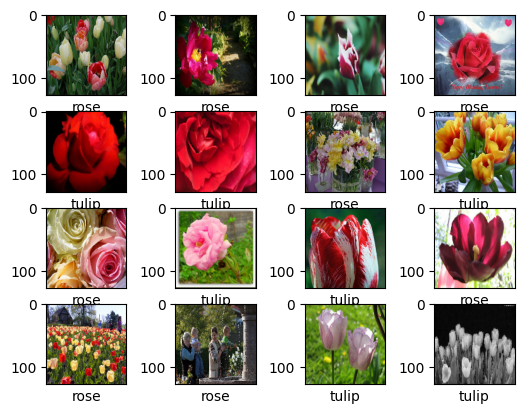

In [16]:
for i in range(16):
    plt.subplot(4,4,i+1)
    id = random.randint(0, len(pred))
    plt.imshow(x_test[id])
    plt.xlabel(categories[y_test[i]])
    categories[np.argmax(pred[i])]
    
    plt.xticks([])

plt.show()

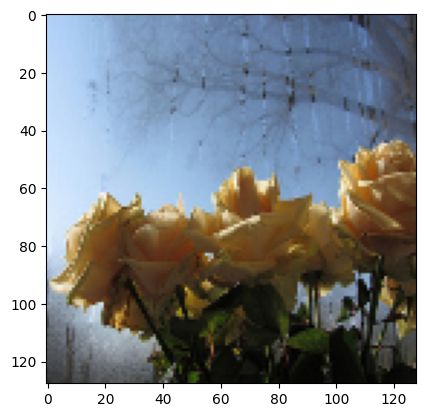

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.00253789]]
Flower is Rose


In [17]:
id1 = random.randint(0,len(y_test)-1)
plt.imshow(x_test[id1])
plt.show()

y_pred = model.predict(x_test[id1,:].reshape(1,128,128,3)) /  255.0
print(y_pred)

if(y_pred[0][0] < 0.003):
    print('Flower is Rose')
else:
    print('Flower is Tulip')